In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


출처: https://www.kaggle.com/code/wguesdon/nyc-airbnb-eda-visualization-regression

**Table of Content¶**
1. Dataset
2. Exploratory Data Analysis
3. Visualization
4. Modeling first model
5. Modeling second model
6. Conclusion
7. References

**1.Dataset**
id: listing ID

- **name**: name of the listing
- **host_id**: host ID
- **host_name**: name of the host
- **neighbourhood_group**: location
- **neighbourhood:** area
- **latitude**: latitude coordinates
-** longitude**: longitude coordinates
- **room_type**: listing space type
- **price**: price in dollars
- **minimum_nights**: amount of nights minimum
- **number_of_reviews**: number of reviews
- **last_review**: latest review
- **reviews_per_month**: number of reviews per month
- **calculated_host_listings_count**: amount of listing per host
- **availability_365**: number of days when listing is available for booking

In [2]:
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation
import warnings

warnings.filterwarnings("ignore")

# 2. EDA

- scope
- 등록되어 있는 호스트와 지역에 대해 무엇을 배울 수 있을까?
- 예측을 통해 어떤 인사이트를 얻을 수 있나? (예: 위치, 가격, 후기 등)
- 가장 인기가 많은 호스트와 그 이유는 무엇인가? 
- 지역별로 눈에 띄는 트래픽 차이가 있다면 그 이유는 무엇일까?


- 변수와 칼럼을 확인하자
- 데이터 집합이 깔끔한가?
- 누락된 값이 있는가?
- 변수의 분포 조사



In [3]:
data = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- 별로 필요할 것 같지 않은 칼럼들은 삭제를 해줄 것이다. 개인정보 관련 칼럼도 삭제한다.
- Name이나 host_name은 필요없을 것 같다. 
- 'last_review'는 날짜이며, 해당 숙소에 대한 리뷰가 없는 경우 날짜는 존재하지 않는다. 이 경우 이 열은 관련이 없고 중요하지 않으므로 해당 값을 추가할 필요가 없다.
- 참고: https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb

In [5]:
# 필요없는 칼럼들(개인정보나 관심없는 칼럼들)을 삭제해준다.
data.drop(['id', 'host_name', 'last_review'], axis = 1, inplace = True)
# visualize the first 5 rows
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [6]:
# null값을 확인해보자
data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- 리뷰에 null값이 많이있다. Name에도 있는데 비교적 적다.
- null값에 대해서 0으로 대체해준다. 

In [7]:
data.fillna({'reviews_per_month': 0}, inplace = True)

In [8]:
#examine the dataset
(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
# 0미만인 숙소는 삭제한다.
data = data.loc[data['price']>0]

In [10]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


- 카테고리형 데이터를 범주형으로 변환해야한다.
- 범주형 변수는 숫자 변수이지만, 데이터의 범위가 제한되어 있는 변수이다.
- 예를 들어, minimum_nights 변수는 숙박 최소일수 변수이다. 
- 이 변수는 1에서 365까지의 숫자를 가질 수 있지만, 대부분의 숙박은 1에서 7일 사이의 최소 일 수를 갖는다.
- 이 경우 minimum_nights 변수를 범주형 변수로 변환하면 분석이 더 쉬워진다. 
- 예를 들어, minimum_nights 변수를 범주형 변수로 변환하면 minimum_nights 변수가 1에서 7일 사이의 최소 일 수 변수와 8일에서 365일 사이의 최소 일 수 변수로 나눌 수 있습니다.
- 이 경우 각 범주에 속하는 숙박의 수를 쉽게 계산할 수 있습니다.

In [11]:

data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=3, labels=["minimum_nights_low","minimum_nights_medium", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=2, labels=["number_of_reviews_low", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])

- null값이 많이 사라졌을 것이다.

In [12]:
data_encoded.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [13]:
data_encoded.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,minimum_nights_low,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_high,availability_high
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,minimum_nights_medium,number_of_reviews_low,reviews_per_month_low,calculated_host_listings_count_low,availability_high
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,minimum_nights_high,number_of_reviews_high,reviews_per_month_low,calculated_host_listings_count_low,availability_low


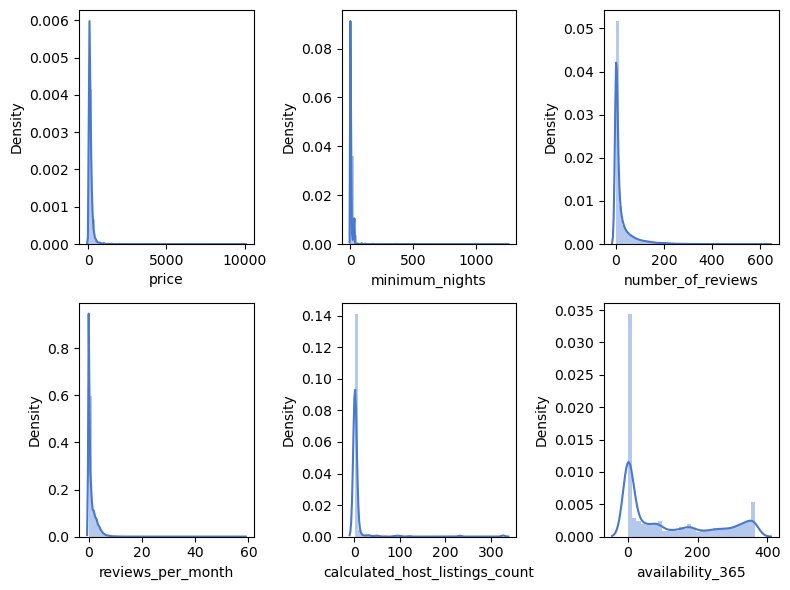

In [14]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(data['price'])

subplot(2,3,2)
sns.distplot(data['minimum_nights'])

subplot(2,3,3)
sns.distplot(data['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(data['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

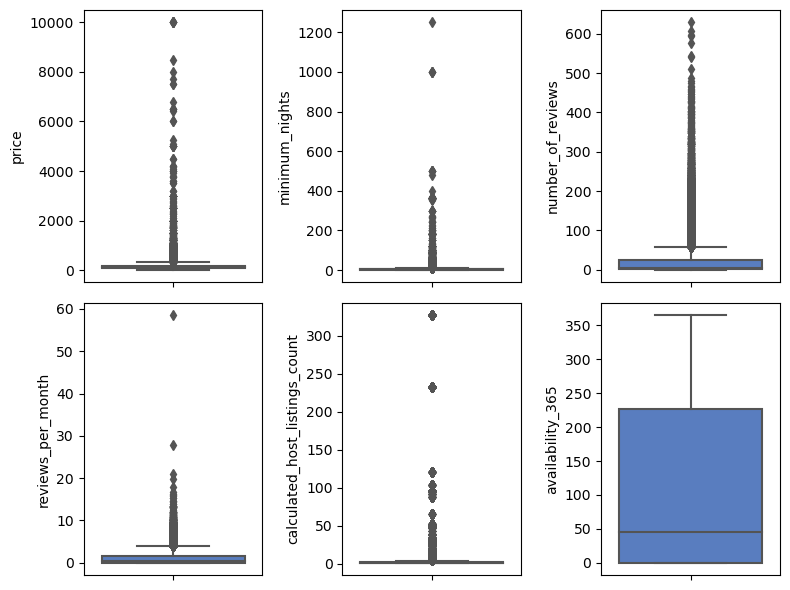

In [15]:
import pylab as plt

from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = data['price']) 

subplot(2,3,2)
sns.boxplot(y = data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

- 대부분의 특성들이 왼쪽으로 치우쳐 있다. 모델링 하기전에 로그를 사용하여 데이터분포를 균일하게 하자.
- 모델링의 영향을 준다.

In [16]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

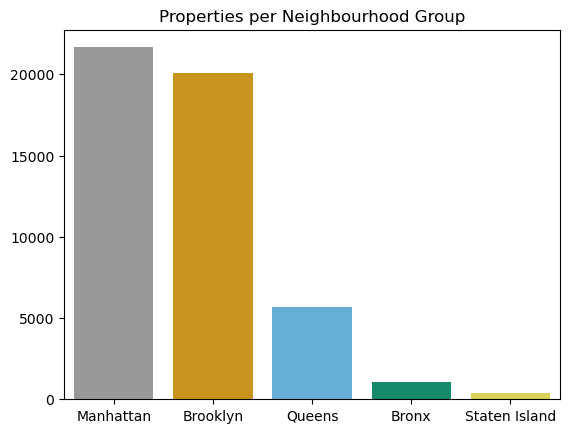

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

title = 'Properties per Neighbourhood Group'
counts = data['neighbourhood_group'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.title(title)
plt.show()


- 대부분의 숙소가 맨해튼이랑 브루클린에 모여있다.

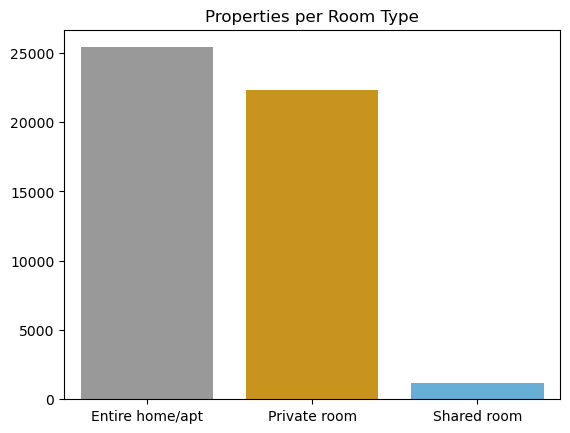

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

title = 'Properties per Room Type'
counts = data['room_type'].value_counts()

sns.barplot(x=counts.index, y=counts.values)
plt.title(title)
plt.show()


대부분의 방은 private room이다. 

# 3. 시각화
- 숙소와 가격의 관계를 살펴보자
- 룸 타입과 가격간의 관계를 살펴보자 

3-1. 상관관계 

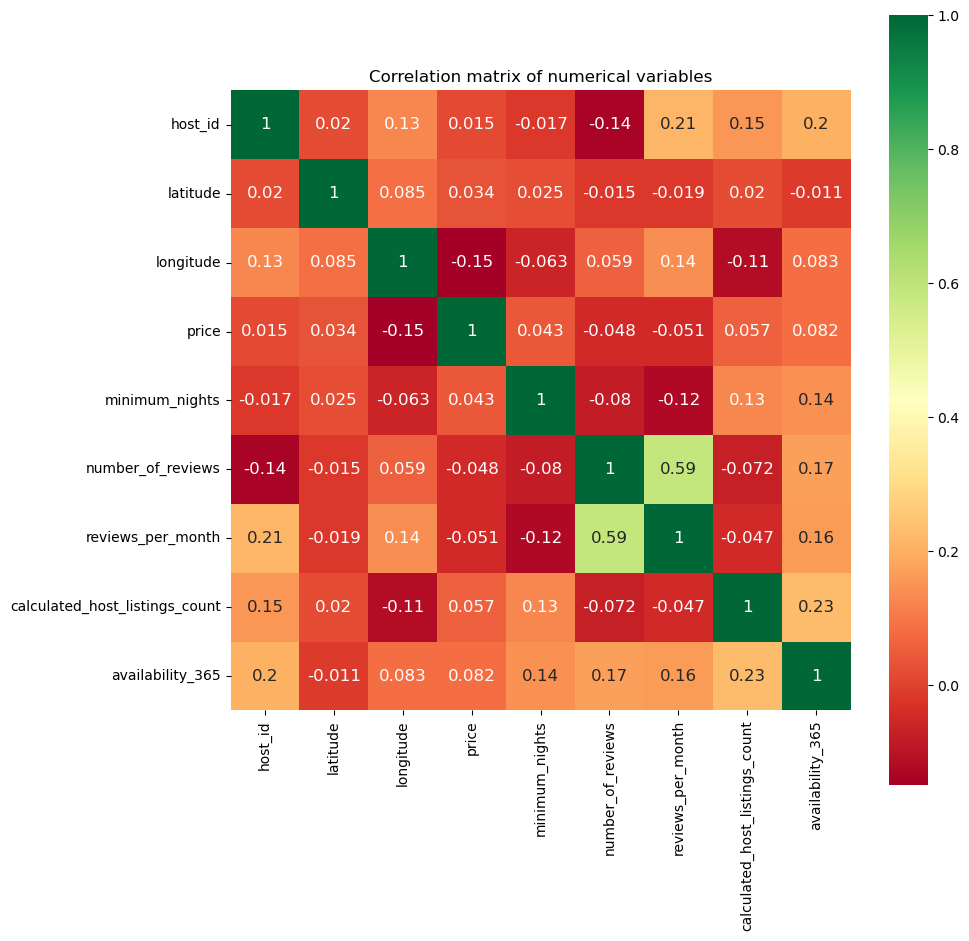

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(), square=True, cmap='RdYlGn', annot=True, annot_kws={'fontsize': 12})
plt.title(title)
plt.show()


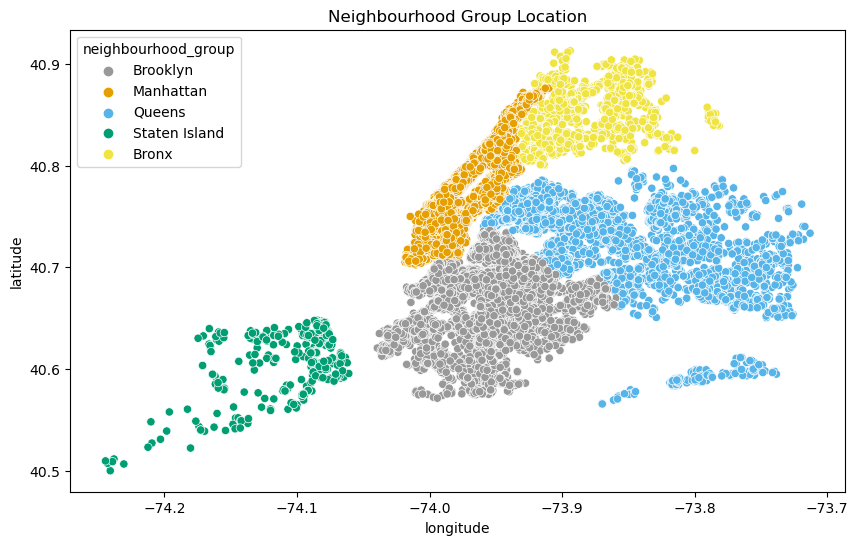

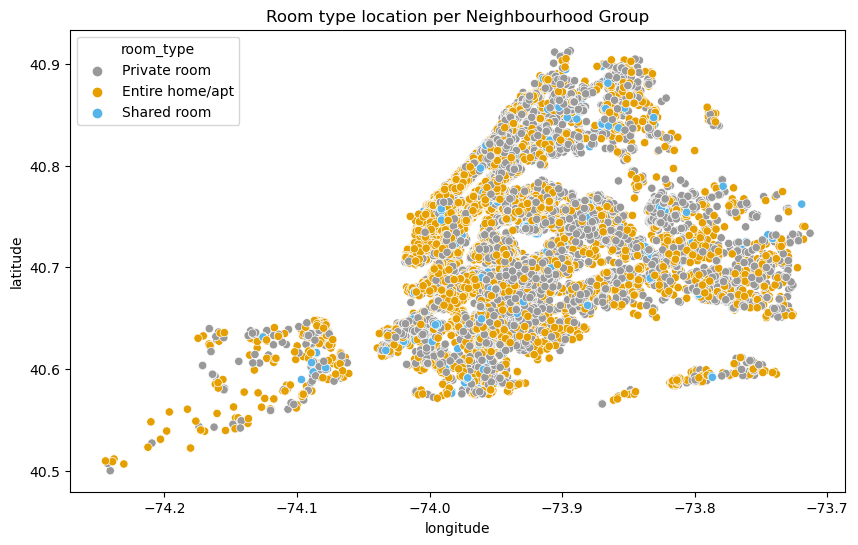

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 첫 번째 그래프: Neighbourhood Group Location
title1 = "Neighbourhood Group Location"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group')
plt.title(title1)
plt.show()

# 두 번째 그래프: Room type location per Neighbourhood Group
title2 = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='room_type')
plt.title(title2)
plt.show()


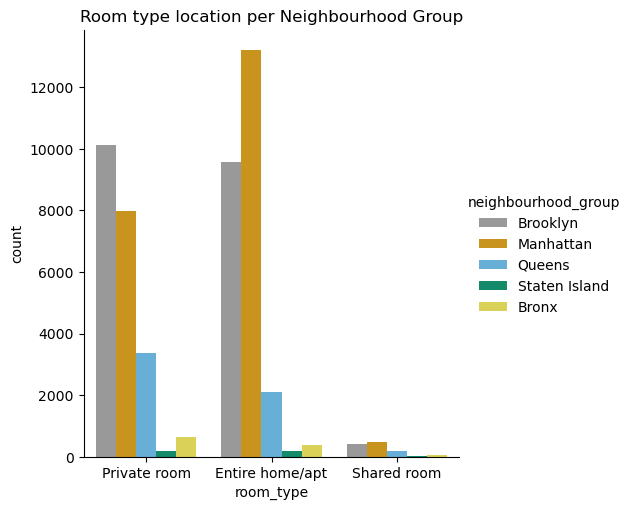

In [21]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=data);
plt.title(title)
plt.ioff()

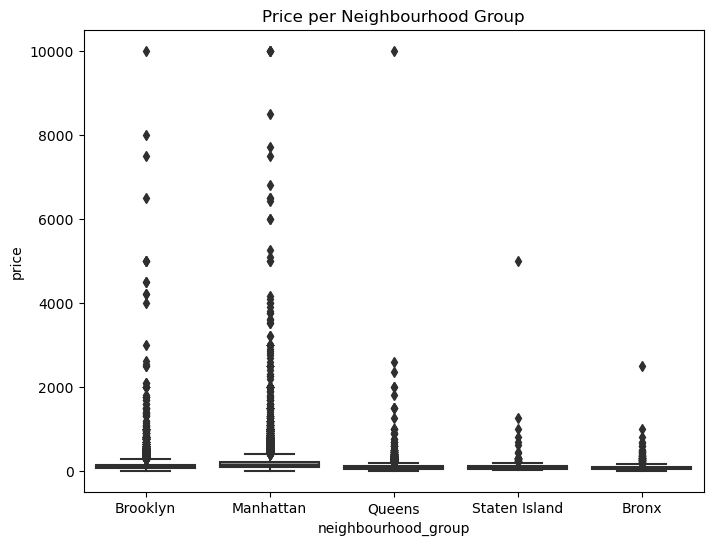

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

x = 'neighbourhood_group'
y = 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.show()


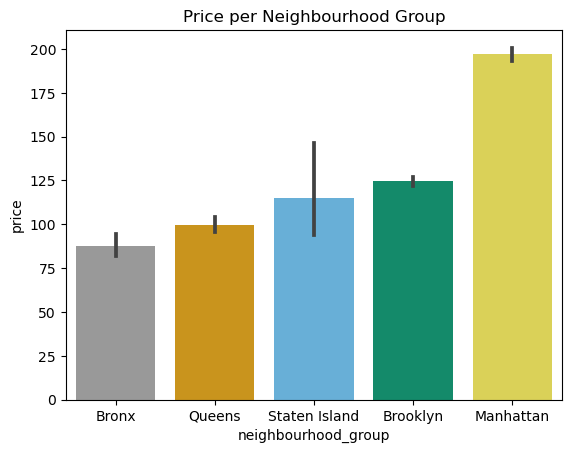

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

result = data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=data, order=result['neighbourhood_group'])
plt.title(title)
plt.show()


- 맨하탄이 비싸긴 하다.

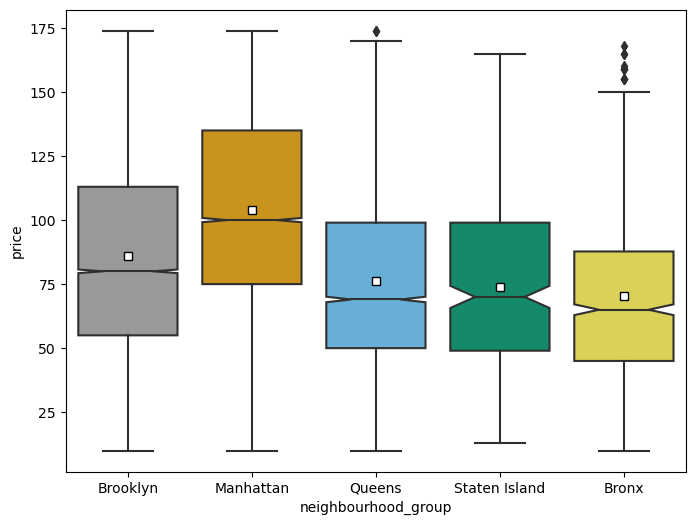

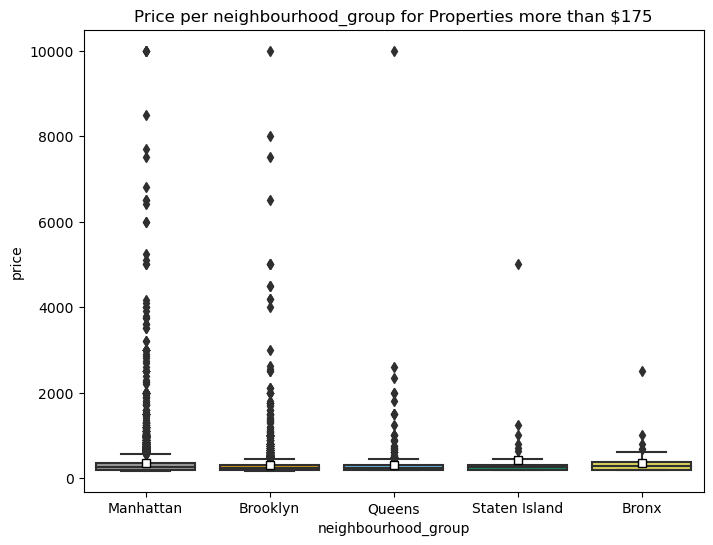

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

x = 'neighbourhood_group'
y = 'price'

title = 'Price per neighbourhood_group for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})

title = 'Price per neighbourhood_group for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})
plt.title(title)
plt.show()


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_filtered = data.loc[data['price'] < 175]

mod = ols('price ~ neighbourhood_group', data=data_filtered).fit()

aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                           sum_sq       df           F  PR(>F)
neighbourhood_group  4.188339e+06      4.0  806.494493     0.0
Residual             4.666018e+07  35939.0         NaN     NaN


In [26]:
pair_t = mod.t_test_pairwise('neighbourhood_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Brooklyn-Bronx,15.539434,1.161363,13.380342,9.863414e-41,13.263127,17.815740,4.931707e-40,True
Manhattan-Bronx,33.543248,1.170763,28.650759,1.605347e-178,31.248517,35.837978,1.284278e-177,True
Queens-Bronx,6.060759,1.235087,4.907151,9.281261e-07,3.639951,8.481566,2.784376e-06,True
Staten Island-Bronx,3.662572,2.283992,1.603584,1.088146e-01,-0.814120,8.139264,2.057885e-01,False
Manhattan-Brooklyn,18.003814,0.422746,42.587799,0.000000e+00,17.175220,18.832408,0.000000e+00,True
Queens-Brooklyn,-9.478675,0.577467,-16.414234,2.509627e-60,-10.610527,-8.346823,1.756739e-59,True
Staten Island-Brooklyn,-11.876861,2.006152,-5.920220,3.244239e-09,-15.808979,-7.944743,1.297696e-08,True
Queens-Manhattan,-27.482489,0.596146,-46.100273,0.000000e+00,-28.650953,-26.314025,0.000000e+00,True
Staten Island-Manhattan,-29.880675,2.011608,-14.854123,9.193965e-50,-33.823488,-25.937863,5.516379e-49,True
Staten Island-Queens,-2.398186,2.049712,-1.170011,2.420042e-01,-6.415684,1.619311,2.420042e-01,False


- coef: 그룹 간의 평균 차이를 나타내는 계수다. 이 값은 그룹 간의 평균 차이의 크기를 나타낸다. 양수인 경우, 첫 번째 그룹의 평균이 더 높다는 것을 의미하며, 음수인 경우, 첫 번째 그룹의 평균이 더 낮다는 것을 의미한다.
- t:  이 값은 평균 차이가 통계적으로 유의한지를 평가하는 데 사용된다. 절댓값이 클수록 그룹 간의 평균 차이가 통계적으로 유의미하다는 것을 나타낸다.
- P>|t|: t-통계량에 대한 p-값이다. 이 값은 그룹 간 평균 차이의 통계적 유의성을 나타내는 지표이다. 유의수준과 비교하여 작은 값일수록 그룹 간의 평균 차이가 통계적으로 유의하다는 것을 의미한다. 일반적으로 유의수준 0.05 미만인 경우, 차이가 통계적으로 유의하다고 간주된다.
- pvalue-hs: Holm-Sidak 방법을 사용하여 다중 비교에 대한 가정을 고려한 결과, 그룹 간 평균 차이가 통계적으로 유의하다는 것을 나타내는 p-값이다. 유의수준과 비교하여 작은 값일수록 그룹 간의 평균 차이가 통계적으로 유의하다는 것을 의미한다.
- reject-hs: Holm-Sidak 방법을 사용하여 다중 비교 결과에 대한 가설 기각 여부를 나타낸다. True 값은 그룹 간 평균 차이가 통계적으로 유의하다는 것을 의미하며, False 값은 그룹 간 평균 차이가 통계적으로 유의하지 않다는 것을 의미한다.

- 175달러 미만 숙소의 경우 지역 그룹에 따라 가격이 크게 다르다.

# 3.4  룸타입별 가격형성

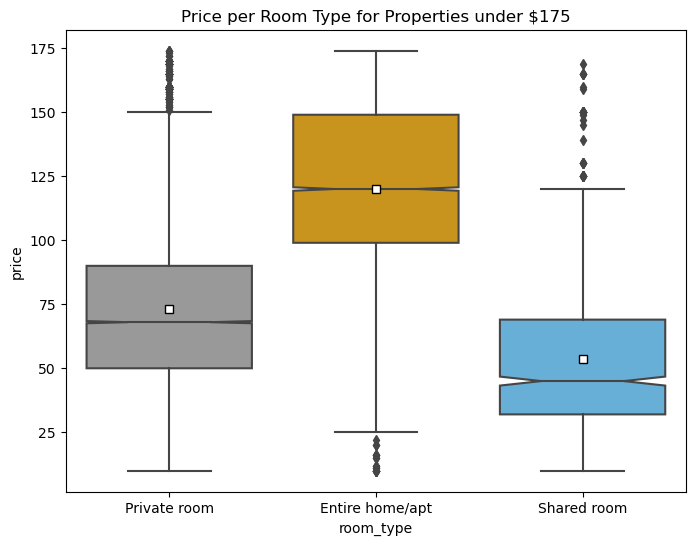

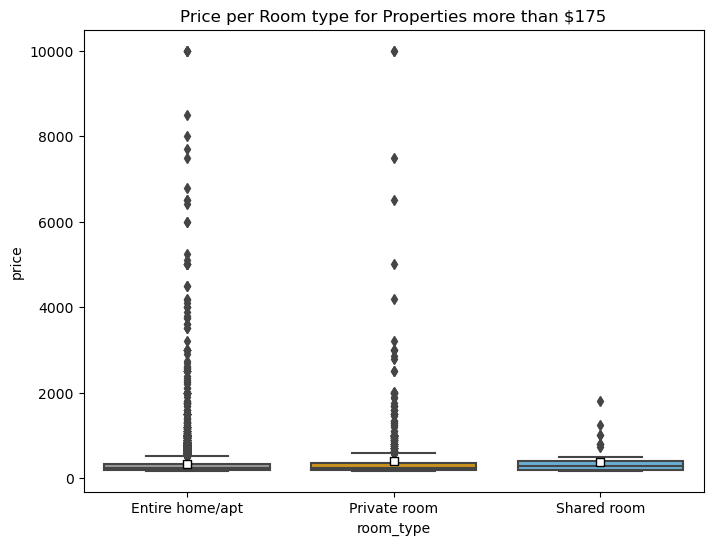

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

title = 'Price per Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=True, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})
plt.title(title)
plt.show()

title = 'Price per Room type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=False, showmeans=True,
            meanprops={"marker": "s", "markerfacecolor": "white", "markeredgecolor": "black"})
plt.title(title)
plt.show()


# 리뷰에 따른 가격형성

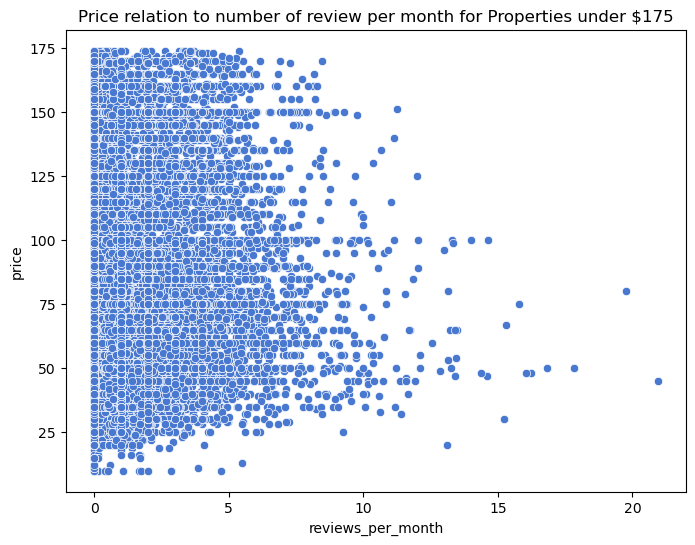

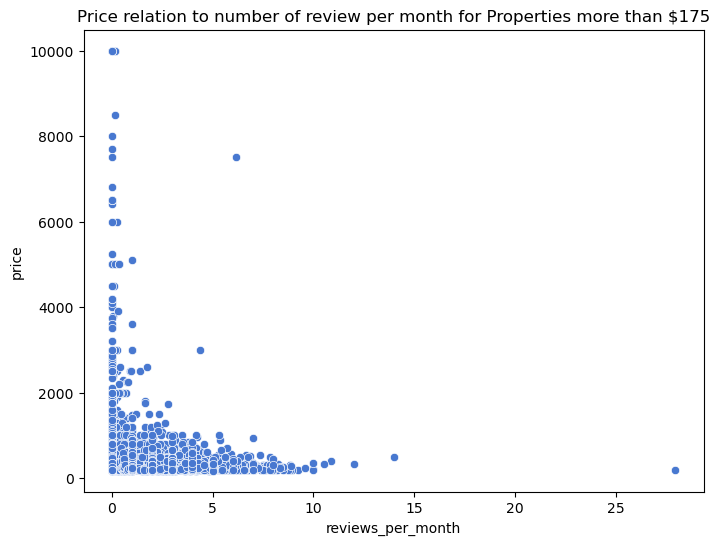

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("muted")

x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.show()

title = 'Price relation to number of review per month for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.show()


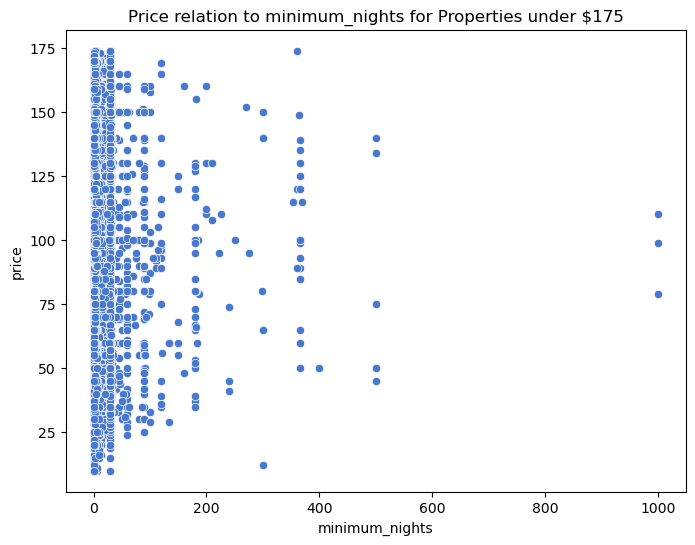

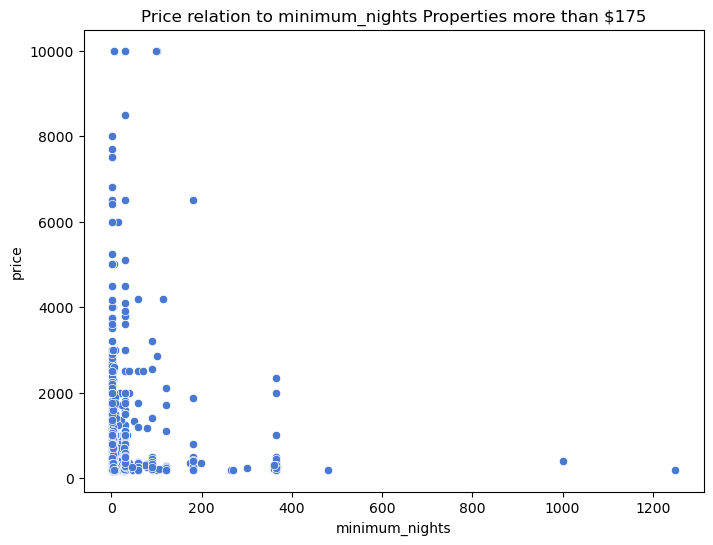

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("muted")

x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $175'
data_filtered = data.loc[(data['price'] < 175)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.show()

title = 'Price relation to minimum_nights Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.show()
sns.set_palette(cbPalette)

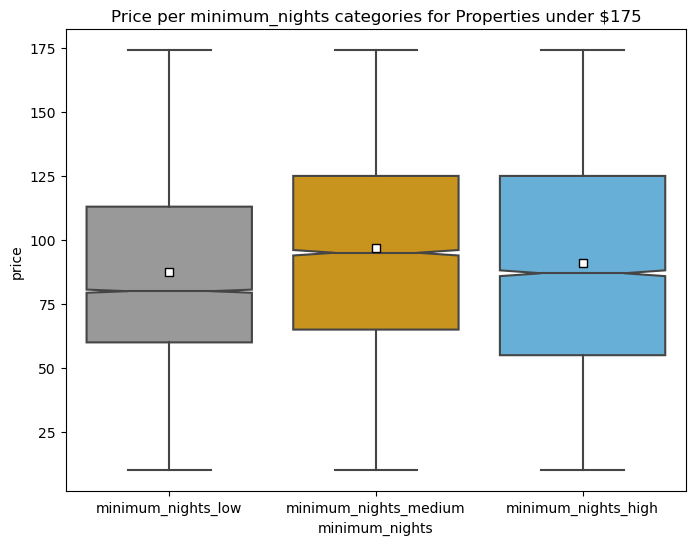

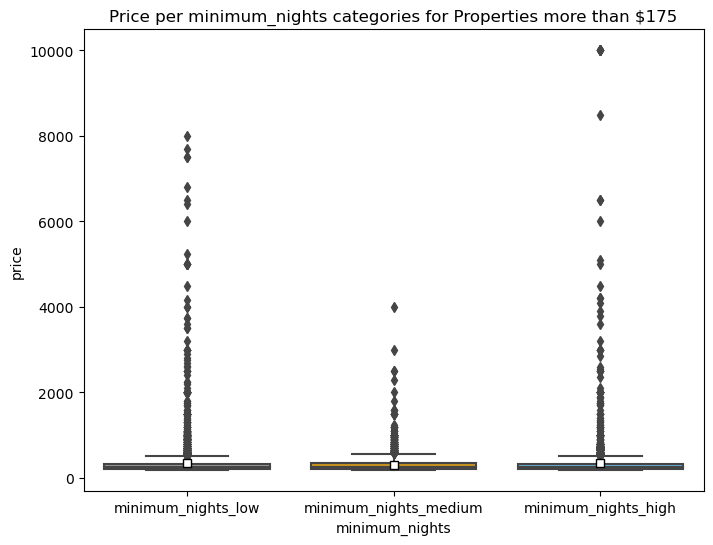

In [30]:
x = 'minimum_nights'
y='price'

title = 'Price per minimum_nights categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)

title = 'Price per minimum_nights categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.show()

# 3.8 Price relation to calulated_host_listings_count

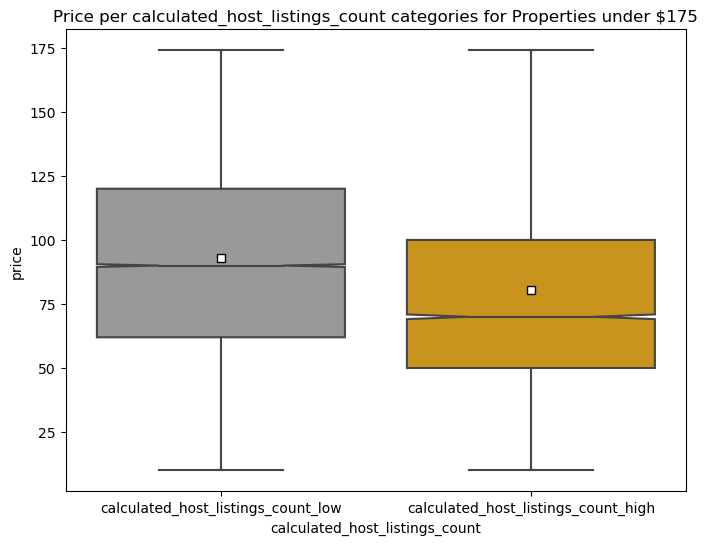

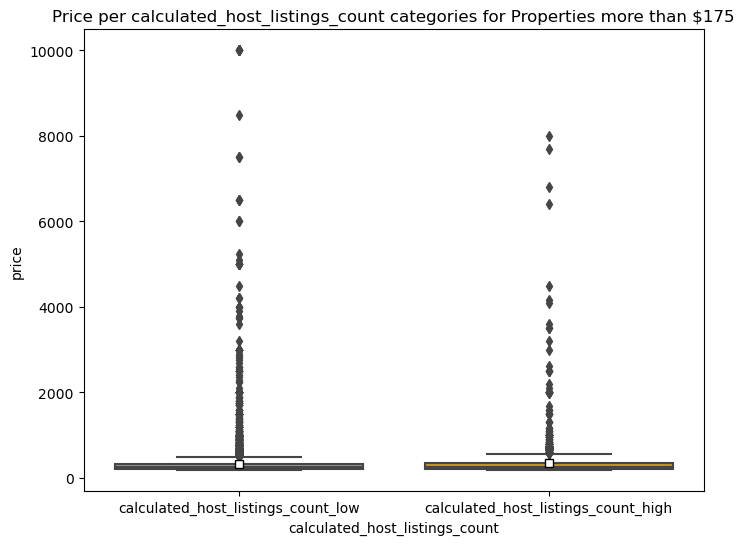

In [31]:
x = 'calculated_host_listings_count'
y='price'

title = 'Price per calculated_host_listings_count categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)

title = 'Price per calculated_host_listings_count categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.show()

- 호스팅을 많이 하는 곳 가격이 비교적 낮네

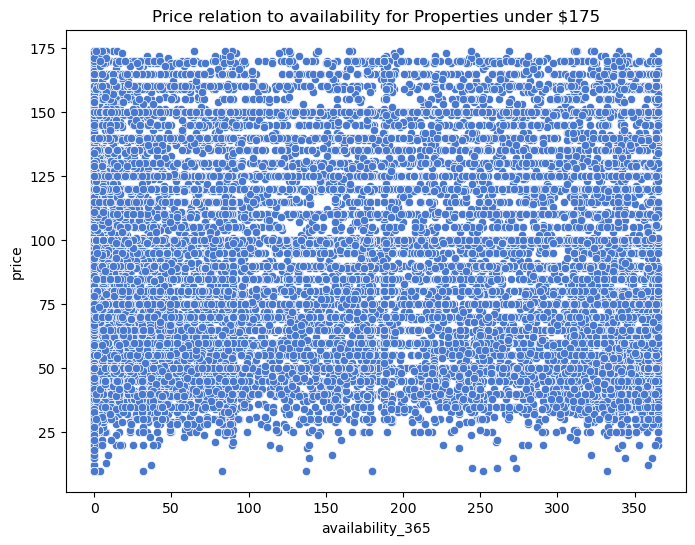

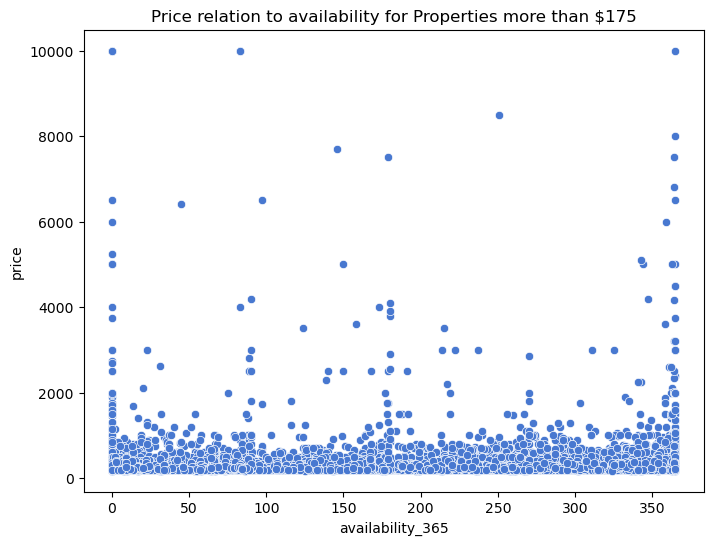

In [32]:
sns.set_palette("muted")
x = 'availability_365'
y = 'price'

title = 'Price relation to availability for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)

title = 'Price relation to availability for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.show()
sns.set_palette(cbPalette)

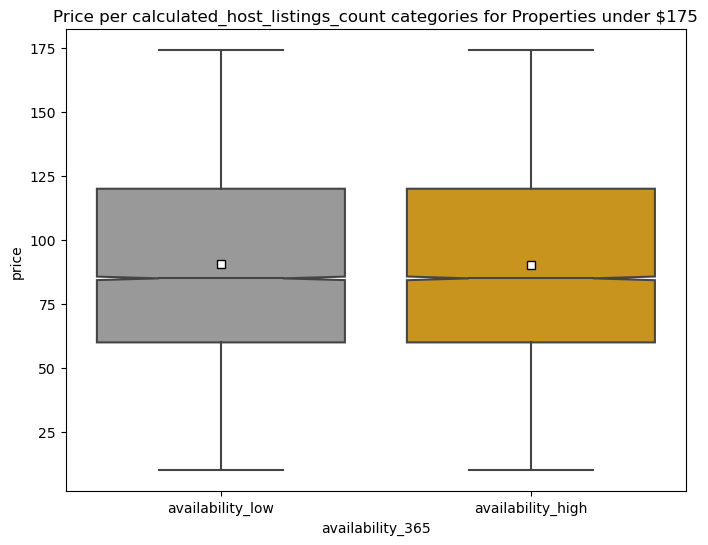

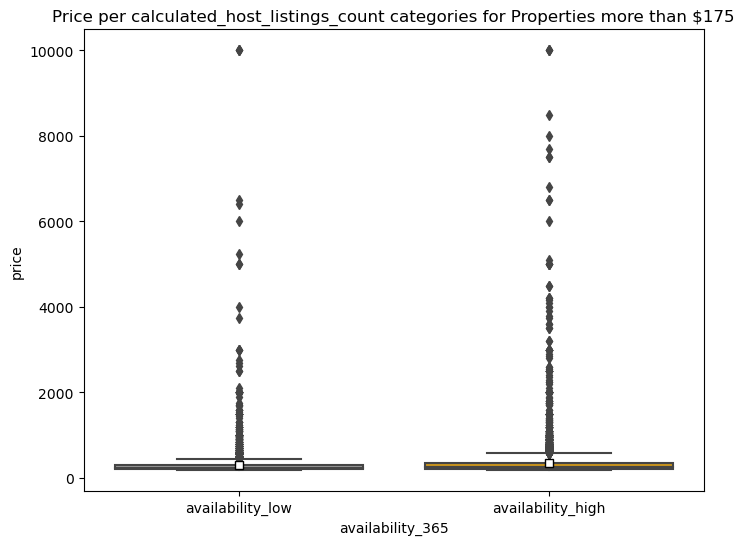

In [33]:
x = 'availability_365'
y='price'

title = 'Price per calculated_host_listings_count categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)

title = 'Price per calculated_host_listings_count categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.show()

In [34]:
data.drop(['name'], axis=1, inplace=True)
data_copy = data.copy()

In [35]:
data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [36]:
data.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- 로그 변환하자

In [37]:
data.minimum_nights += 0.000000001
data['minimum_nights'] = np.log10(data['minimum_nights'])
data.number_of_reviews += 0.000000001
data['number_of_reviews'] = np.log10(data['number_of_reviews'])
data.reviews_per_month += 0.000000001
data['reviews_per_month'] = np.log10(data['reviews_per_month'])
data.calculated_host_listings_count += 0.000000001
data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
data.availability_365 += 0.000000001
data['availability_365'] = np.log10(data['availability_365'])

In [38]:
object_columns = data.select_dtypes(include='object').columns
print(object_columns)


Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')


In [39]:
# Encoding categorical data
data = pd.get_dummies(data, columns=['room_type'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood_group'], drop_first=True)

In [40]:
data

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_Private room,...,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,2787,40.64749,-73.97237,149,4.342945e-10,0.954243,-0.677781,7.781513e-01,2.562293,1,...,0,0,0,0,0,0,1,0,0,0
1,2845,40.75362,-73.98377,225,4.342945e-10,1.653213,-0.420216,3.010300e-01,2.550228,0,...,0,0,0,0,0,0,0,1,0,0
2,4632,40.80902,-73.94190,150,4.771213e-01,-9.000000,-9.000000,4.342945e-10,2.562293,1,...,0,0,0,0,0,0,0,1,0,0
3,4869,40.68514,-73.95976,89,4.342945e-10,2.431364,0.666518,4.342945e-10,2.287802,0,...,0,0,0,0,0,0,1,0,0,0
4,7192,40.79851,-73.94399,80,1.000000e+00,0.954243,-1.000000,4.342945e-10,-9.000000,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,40.67853,-73.94995,70,3.010300e-01,-9.000000,-9.000000,3.010300e-01,0.954243,1,...,0,0,0,0,0,0,1,0,0,0
48891,6570630,40.70184,-73.93317,40,6.020600e-01,-9.000000,-9.000000,3.010300e-01,1.556303,1,...,0,0,0,0,0,0,1,0,0,0
48892,23492952,40.81475,-73.94867,115,1.000000e+00,-9.000000,-9.000000,4.342945e-10,1.431364,0,...,0,0,0,0,0,0,0,1,0,0
48893,30985759,40.75751,-73.99112,55,4.342945e-10,-9.000000,-9.000000,7.781513e-01,0.301030,0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Filter the dataset for prices between 50 and $175
data_filtered_low = data.loc[(data['price'] < 175)]

In [42]:
data_filtered_low.shape

(35944, 235)

In [43]:
data_filtered_high = data.loc[(data['price'] > 175)]
data_filtered_high.shape

(12177, 235)